### bayes

skl有多种bayes分类器,区别是假设不同的条件概率分布.

1.GaussianNB分布

2.MultinomialNB分布

3.BernoulliNB分布


In [1]:
from sklearn import datasets,cross_validation,model_selection,naive_bayes
import numpy as np
import matplotlib.pyplot as plt

vector from image0: [  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


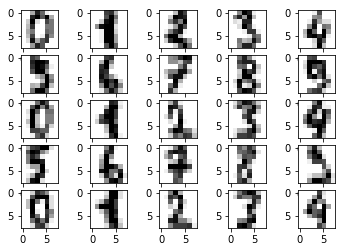

In [4]:
def show_digits():
    digits=datasets.load_digits()
    fig=plt.figure()
    print("vector from image0:",digits.data[0])
    for i in range(25):
        ax=fig.add_subplot(5,5,i+1)
        ax.imshow(digits.images[i],cmap=plt.cm.gray_r,interpolation='nearest')
    plt.show()
    
show_digits()

In [5]:
def load_digits():
    digits=datasets.load_digits()
    return model_selection.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)

X_train,X_test,y_train,y_test=load_digits()

#### GaussianNB

第i个样本的第j个特征

$$P(X^{(j)}|y=c_k)=\frac{1}{\sqrt{2\pi \sigma _k^2}}*exp(-\frac{(X^{(j)}-\mu _k)^2}{2\sigma _k^2})$$

In [6]:
def test_GaussianNNB(*data):
    X_train,X_test,y_train,y_test=data
    cls=naive_bayes.GaussianNB()
    cls.fit(X_train,y_train)
    print("Train score:%.2f" %cls.score(X_train,y_train))
    print("Test  score:%.2f" %cls.score(X_test,y_test))
    
test_GaussianNNB(X_train,X_test,y_train,y_test)

Train score:0.86
Test  score:0.83


#### MultinomialNB

第j个特征,该特征共有Skj个可取的值.
$$P(X^{(j)}=a_{s_j}|y=c_k)=\frac{N_{kj}+\alpha }{N_k+\alpha n}$$


In [7]:
def test_MultinomialNB(*data):
    X_train,X_test,y_train,y_test=data
    cls=naive_bayes.MultinomialNB()
    cls.fit(X_train,y_train)
    print("Train score:%.2f" %cls.score(X_train,y_train))
    print("Test  score:%.2f" %cls.score(X_test,y_test))

test_MultinomialNB(X_train,X_test,y_train,y_test)

Train score:0.91
Test  score:0.91


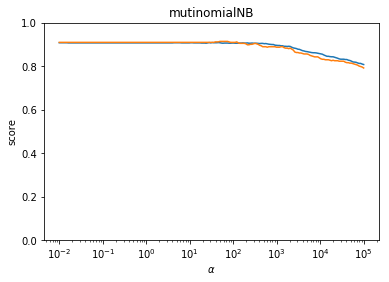

In [8]:
def test_MultinomialNB_alpha(*data):
    X_train,X_test,y_train,y_test=data
    alphas=np.logspace(-2,5,num=200)
    train_scores=[]
    test_scores=[]
    for alpha in alphas:
        cls=naive_bayes.MultinomialNB(alpha=alpha)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,train_scores,label="Training Scores")
    ax.plot(alphas,test_scores,label="Testing Scores")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_title("mutinomialNB")
    ax.set_xscale('log')
    plt.show()
    
test_MultinomialNB_alpha(X_train,X_test,y_train,y_test)


当alpha趋于无穷大时,该概率趋近于定值,不受特征差异影响.
$$\alpha \rightarrow \infty$$ 
$$P(X^{(j)}=a_{s_j}|y=c_k)\rightarrow \frac{1}{n}$$

#### bernoulliNB

$$P(X^{(j)}|y=c_k)=pX^{(j)}+(1-p)(1-X^{(j)})$$

In [9]:
def test_BernoulliNB(*data):
    X_train,X_test,y_train,y_test=data
    cls=naive_bayes.BernoulliNB()
    cls.fit(X_train,y_train)
    print("Train score:%.2f" %cls.score(X_train,y_train))
    print("Test  score:%.2f" %cls.score(X_test,y_test))

test_BernoulliNB(X_train,X_test,y_train,y_test)

Train score:0.87
Test  score:0.85


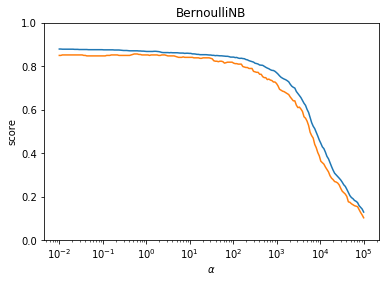

In [10]:
def test_BernoulliNB_alpha(*data):
    X_train,X_test,y_train,y_test=data
    alphas=np.logspace(-2,5,num=200)
    train_scores=[]
    test_scores=[]
    for alpha in alphas:
        cls=naive_bayes.BernoulliNB(alpha=alpha)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))

    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas,train_scores,label="Training Scores")
    ax.plot(alphas,test_scores,label="Testing Scores")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_title("BernoulliNB")
    ax.set_xscale('log')
    plt.show()
    
test_BernoulliNB_alpha(X_train,X_test,y_train,y_test)

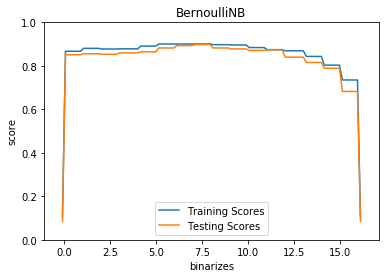

In [13]:
def test_BernoulliNB_binarize(*data):
    X_train,X_test,y_train,y_test=data
    min_x=min(np.min(X_train.ravel()),np.min(X_test.ravel()))-0.1 # 把X_train的值排成一行,取出最小值.
    max_x=max(np.max(X_train.ravel()),np.max(X_test.ravel()))+0.1
    binarizes=np.linspace(min_x,max_x,endpoint=True,num=100)
    train_scores=[]
    test_scores=[]
    for binarize in binarizes:
        cls=naive_bayes.BernoulliNB(binarize=binarize)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(binarizes,train_scores,label="Training Scores")
    ax.plot(binarizes,test_scores,label="Testing Scores")
    ax.set_xlabel("binarizes")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.set_xlim(min_x-1,max_x+1)
    ax.set_title("BernoulliNB")
    ax.legend(loc="best")
    plt.show()
    
test_BernoulliNB_binarize(X_train,X_test,y_train,y_test)

看图说话:  

1.binarize最小可以取所有特征值最小值减0.1,当binarize取最左点时,它认为所有的特征值为1.

2.binarize最大可以去所有特征值最大值加0.1,当binarize取最右点时,它认为所有的特征值为0.

这两种情况都是会导致推测断崖式错误.



> 经验: binarize可以取(所有特征值的最小值+所有特征值的最大值)/2
